# More calculations

By now we have been only calculating properties "on point", but we can do
more than that with `yaeos`. Here we have a few examples:

## Calculating an isotherm

Let's create a plot Pressure vs Volume at a given temperature (250 K) for a
pure component. Let's use carbon dioxide.

Text(0, 0.5, 'Pressure [bar]')

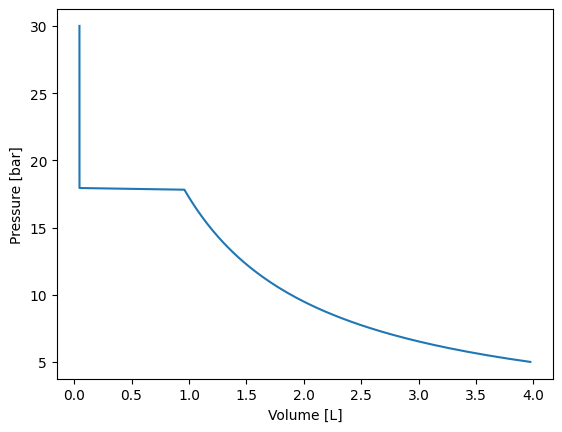

In [3]:
from yaeos import SoaveRedlichKwong
import numpy as np
import matplotlib.pyplot as plt


n = [1.0]           # mole number of CO2 [mol]
Tc = [304.2]        # critical temperature of CO2 [K]
Pc = [73.8]         # critical pressure of CO2 [bar]
w = [0.2236]        # acentric factor of CO2 [-]

# Instantiate a Soave-Redlich-Kwong equation of state model
model = SoaveRedlichKwong(Tc, Pc, w)

# Calculate isotherm at 250 K
t = 250  # K

pressures = np.linspace(5, 30, 200) # pressures list
volumes = [] # list to store the volumes


for p in pressures:
    # Calculate volume for each pressure
    volume = model.volume(n, p, t, root="stable")
    volumes.append(volume)

# Make plot
plt.plot(volumes, pressures)
plt.xlabel("Volume [L]")
plt.ylabel("Pressure [bar]")


# Calculate a saturation pressure
## Pure compound

In the previous example we obtained an isotherm for carbon dioxide at 250 K. We
can check in the plot that the saturation pressure is around 18 bar. Let's
calculate the previous saturation pressure using `yaeos` and the instantiated
`model`.


In [4]:
sat_point = model.saturation_pressure(z=[1.0], temperature=250.0)

print(sat_point)

{'x': array([1.]), 'y': array([1.00001087]), 'Vx': 0.046689498895265885, 'Vy': 0.953487212716271, 'T': 250.0, 'P': 17.916706378791627, 'beta': 0.0}


There we obtained a Python dictionary with the result of the saturation
pressure calculation. In this example we have a pure compound (CO2), so we are
only interested in the `P` result (the saturation pressure).

In [5]:
print(sat_point["P"], " bar")

17.916706378791627  bar


The DIPPR correlated value for the saturation pressure of CO2 at 250 K is 17.88
bar, so SoaveRedlichKwong is doing a good job in this case.

## Mixture

Of course, in thermodynamics there is not only pure compounds, we can also
use `yaeos` to calculate the saturation pressure of a mixture. Let's calculate
the saturation pressure of a mixture of 50% CO2 and 50% n-butane at 250 K. But
now let's use `PengRobsinson78`.

In [6]:
from yaeos import PengRobinson78

# Pure compounds properties
n = [0.5, 0.5]                # mole number of CO2 and n-butane [mol]
Tc = [304.2, 425.1]           # critical temperature of CO2 and n-butane [K]
Pc = [73.8, 38.0]             # critical pressure of CO2 and n-butane [bar]
w = [0.2236, 0.200164]        # acentric factor of CO2 and n-butane [-]


model = PengRobinson78(Tc, Pc, w)


# Calculate bubble point pressure
bubble_point = model.saturation_pressure(z=n, temperature=250.0, kind="bubble")

# Calculate dew point pressure
dew_point = model.saturation_pressure(z=n, temperature=250.0, kind="dew")

Let's check our results:

In [7]:
bubble_point

{'x': array([0.5, 0.5]),
 'y': array([0.96800306, 0.03199694]),
 'Vx': 0.06509074642358811,
 'Vy': 2.296393458679319,
 'T': 250.0,
 'P': 8.269690420846779,
 'beta': 0.0}

In [8]:
dew_point

{'x': array([0.02630095, 0.97369904]),
 'y': array([0.5, 0.5]),
 'Vx': 0.0869521889708558,
 'Vy': 26.111737262892674,
 'T': 250.0,
 'P': 0.7816128221171396,
 'beta': 1.0}